In [ ]:
import os
from dotenv import load_dotenv
load_dotenv()

True

In [ ]:
google_api_key = os.getenv("GOOGLE_API_KEY")

In [ ]:
import google.generativeai as genai

In [ ]:
genai.configure(api_key = google_api_key)

In [ ]:
from llama_index.core import SimpleDirectoryReader
from llama_index.core import VectorStoreIndex
from llama_index.llms.gemini import Gemini
from IPython.display import Markdown, display
from llama_index.core import ServiceContext
from llama_index.core import StorageContext, load_index_from_storage

In [ ]:
genai.configure(api_key = google_api_key)

In [ ]:
document = SimpleDirectoryReader("./Data")

In [ ]:
document.load_data()

[Document(id_='9e2bed70-50a5-495d-8b22-b9d725b1717a', embedding=None, metadata={'file_path': 'c:\\Users\\prabh\\srijan\\QA_llamaindex_geminiAPI_embedding\\Data\\indian_railway_gyankosh.txt', 'file_name': 'indian_railway_gyankosh.txt', 'file_type': 'text/plain', 'file_size': 29199, 'creation_date': '2024-12-22', 'last_modified_date': '2024-12-22'}, excluded_embed_metadata_keys=['file_name', 'file_type', 'file_size', 'creation_date', 'last_modified_date', 'last_accessed_date'], excluded_llm_metadata_keys=['file_name', 'file_type', 'file_size', 'creation_date', 'last_modified_date', 'last_accessed_date'], relationships={}, metadata_template='{key}: {value}', metadata_separator='\n', text_resource=MediaResource(embeddings=None, data=None, text="Indian Railways:- \r\n\r\nIndian Railways is a state-owned enterprise that is organised as a deparmental undertaking of the Ministry of Railways of the Government of India and operates India's national railway system.[a] As of 2023, it manages the f

Bhai shahb sara 4234 words are loaded

In [ ]:
doc = document.load_data()

In [ ]:
print(doc[0].text)

Indian Railways:- 

Indian Railways is a state-owned enterprise that is organised as a deparmental undertaking of the Ministry of Railways of the Government of India and operates India's national railway system.[a] As of 2023, it manages the fourth largest national railway system by size with a track length of 132,310 km (82,210 mi), running track length of 106,493 km (66,172 mi) and route length of 68,584 km (42,616 mi). As of August 2024, 96.59% of the broad-gauge network is electrified. With more than 1.2 million employees, it is the world's ninth-largest employer and India's second largest employer.

In 1951, the Indian Railways was established by the amalgamation of 42 different railway companies operating in the country, spanning a total of 55,000 km (34,000 mi). The railway network across the country was reorganized into six regional zones in 1951–52 for administrative purposes, which was gradually expanded to 18 zones over the years.

The first steam operated railway operated i

So my document of railway gyan kosh is loaded in the program successfully. Data Ingestion is done

In [ ]:
from llama_index.core import Settings

Thanks for sharing the detailed excerpt from the LlamaIndex documentation. This indeed sheds light on the newer `Settings` object and its usage in place of the older `ServiceContext`. Here's a breakdown and explanation of how it works:

---

### **Understanding `Settings`**

`Settings` is a **singleton object** introduced to standardize and simplify the configuration of various components in LlamaIndex workflows. Instead of setting configurations individually for LLMs, embeddings, tokenizers, etc., it allows a **global configuration** for these components that can be overridden locally when needed.

---

### **Key Features of `Settings`**

1. **Centralized Configuration**  
   Define global defaults for:
   - **LLM** (e.g., OpenAI GPT models).
   - **Embedding Models** (e.g., OpenAIEmbedding).
   - **Text Splitters** for chunking documents.
   - **Tokenizers** for token counting.
   - **Callbacks** for monitoring events (e.g., token usage).

2. **Local Overrides**  
   You can override global settings for specific use cases (like querying or indexing) by passing components directly to the relevant interfaces.

3. **Singleton Pattern**  
   `Settings` persists throughout the application and ensures consistent behavior unless explicitly overridden.

---

### **How to Use `Settings`**

1. **Configuring an LLM:**
   ```python
   from llama_index.llms.openai import OpenAI
   from llama_index.core import Settings

   Settings.llm = OpenAI(model="gpt-3.5-turbo", temperature=0.1)
   ```

2. **Configuring an Embedding Model:**
   ```python
   from llama_index.embeddings.openai import OpenAIEmbedding
   from llama_index.core import Settings

   Settings.embed_model = OpenAIEmbedding(
       model="text-embedding-ada-002", embed_batch_size=100
   )
   ```

3. **Customizing Text Splitters:**
   ```python
   from llama_index.core.node_parser import SentenceSplitter
   from llama_index.core import Settings

   Settings.text_splitter = SentenceSplitter(chunk_size=1024)
   ```

4. **Setting a Callback Manager:**
   ```python
   from llama_index.core.callbacks import TokenCountingHandler, CallbackManager
   from llama_index.core import Settings

   token_counter = TokenCountingHandler()
   Settings.callback_manager = CallbackManager([token_counter])
   ```

---

### **How It Helps Compared to `ServiceContext`**

1. **Simplifies Migration:**  
   Instead of creating a `ServiceContext` object, you directly use `Settings` for global defaults and avoid unnecessary code repetition.

2. **Flexibility with Overrides:**  
   Local overrides are cleaner and allow modular configurations for indexing and querying.

3. **Future Compatibility:**  
   As `ServiceContext` is deprecated, `Settings` ensures compatibility with the latest LlamaIndex updates.

---

### **Applying It to Your Code**

If you're encountering the deprecation of `ServiceContext`, the equivalent `Settings` configuration for your case would look like this:

```python
from llama_index.core import Settings
from llama_index.llms.openai import OpenAI
from llama_index.embeddings.openai import OpenAIEmbedding

# Configure global settings
Settings.llm = OpenAI(model="gpt-3.5-turbo", temperature=0.7)
Settings.embed_model = OpenAIEmbedding(model="text-embedding-ada-002")
Settings.chunk_size = 800
Settings.chunk_overlap = 20

# Local override during indexing
index = VectorStoreIndex.from_documents(documents)

# Local override during querying
query_engine = index.as_query_engine(llm=Settings.llm)
```

---

### **Next Steps**

- Ensure you have the latest `llama_index` version using `pip install --upgrade llama-index`.
- Replace `ServiceContext` usage with `Settings` where needed.
- Refer to the official [LlamaIndex documentation](https://docs.llamaindex.ai/) for detailed examples and updates.

Let me know if you'd like help refactoring your specific code!

In [ ]:
import llama_index.llms as llms

# List all attributes of the llms module
print(dir(llms))

['__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', 'gemini']


In [ ]:
import llama_index.llms.gemini as gemini

print(dir(gemini))

['Gemini', '__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', 'base', 'utils']


In [ ]:
from llama_index.llms.gemini import Gemini
from llama_index.core import Settings

In [ ]:
gemini = Gemini()

In [ ]:
print(dir(Gemini))

['__abstractmethods__', '__annotations__', '__class__', '__class_getitem__', '__class_vars__', '__copy__', '__deepcopy__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__fields_set__', '__format__', '__ge__', '__get_pydantic_core_schema__', '__get_pydantic_json_schema__', '__getattr__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__pretty__', '__private_attributes__', '__pydantic_complete__', '__pydantic_computed_fields__', '__pydantic_core_schema__', '__pydantic_custom_init__', '__pydantic_decorators__', '__pydantic_extra__', '__pydantic_fields__', '__pydantic_fields_set__', '__pydantic_generic_metadata__', '__pydantic_init_subclass__', '__pydantic_parent_namespace__', '__pydantic_post_init__', '__pydantic_private__', '__pydantic_root_model__', '__pydantic_serializer__', '__pydantic_validator__', '__reduce__', '__reduce_ex__', '__replace__', '__repr__', '__

In [ ]:
print(gemini.metadata)

context_window=1056768 num_output=8192 is_chat_model=True is_function_calling_model=False model_name='models/gemini-2.0-flash-exp' system_role=<MessageRole.SYSTEM: 'system'>


chalo atleast model ka name to pta chala : gemini-2.0-flash-exp

The **purpose of LlamaIndex Settings** is to act like a **control center** for fine-tuning and optimizing how your QA system works. Instead of scattering configurations all over the code, it provides a single place to define:  

1. **How the models behave**: Settings let you specify which LLM to use (e.g., Gemini 2.0 Flash) and how it generates answers (like response creativity or accuracy).  
2. **How documents are processed**: It defines how large chunks of data are split (chunk size) and how much overlap is kept between chunks, balancing speed and retrieval accuracy.  
3. **Which embedding model is used**: The settings allow you to select the best embedding model (e.g., Google Embedding-001) for creating meaningful document embeddings, making retrieval smarter and faster.  
4. **Why it's useful**: Instead of hardcoding parameters across the pipeline, the settings make it easy to tweak and experiment with these configurations in one place, ensuring consistency and adaptability.

Think of it like a **dashboard** that controls and fine-tunes the "engine" of your QA system!

In [ ]:
# Configure global settings
Settings.llm = Gemini(model = "models/gemini-2.0-flash-exp", temperature = 1.0)

In [ ]:
from llama_index.embeddings.gemini import GeminiEmbedding

In [ ]:
Settings.embed_model = GeminiEmbedding(model_name = "models/embedding-001")

In [ ]:
Settings.chunk_size = 800
Settings.chunk_overlap = 20

In [ ]:
index = VectorStoreIndex.from_documents(doc)

Bingo successfully index i have created

In [ ]:
print(index)

In [ ]:
index.storage_context.persist()

So locally the embeddings/number representation of data is saved. Aur total 7689 numbers are generated in 1D list

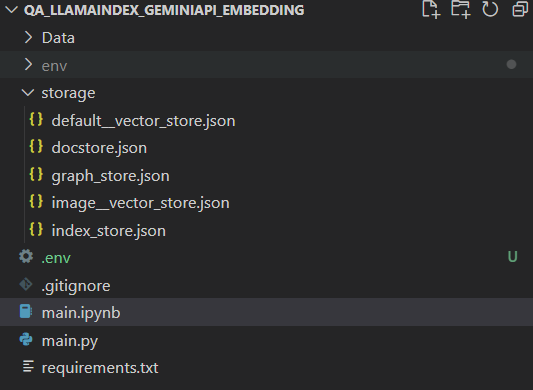

Great question! Let's break this down:

### **What is `VectorStoreIndex`?**

The **`VectorStoreIndex`** is part of the **LlamaIndex** (formerly GPT Index) library, which is designed to index documents and make them retrievable based on vector similarity search. Here's a simplified explanation of what it does:

- **Purpose:** It stores documents (or more precisely, their embeddings) in a way that makes it easy to retrieve and search for relevant information based on the similarity of vector representations of the documents.
- **VectorStore:** The index uses a vector store, which is essentially a data structure that holds the vector embeddings of the documents. This allows efficient retrieval of documents based on similarity (usually cosine similarity) to a query vector.

In your case, **`VectorStoreIndex`** is holding the **vector representations** (embeddings) of your documents so that you can later perform searches or other operations based on their content.

### **How Does `VectorStoreIndex` Work in Your Code?**

1. **Embeddings Generation:**
   You are using the following line to generate embeddings for the documents:
   ```python
   Settings.embed_model = GeminiEmbedding(model_name = "models/embedding-001")
   ```
   - **`GeminiEmbedding`** is the model you're using to convert documents into vectors. The model **"models/embedding-001"** likely corresponds to an embedding model trained to convert text (documents) into fixed-size vectors, with each number in the vector representing semantic information about the text.
   - This model generates embeddings for your documents, which are numerical representations (vectors) that capture the content of each document in a multi-dimensional space (e.g., 768-dimensional vector).

2. **Creating the Index:**
   ```python
   index = VectorStoreIndex.from_documents(doc)
   ```
   - Once you've generated the embeddings, **`VectorStoreIndex`** takes these embeddings and stores them in a vector store. This allows the index to efficiently search for and retrieve documents based on vector similarity.
   - The vector store is optimized for searching similar vectors (i.e., documents that are similar in meaning to a given query).

3. **Persisting the Index:**
   ```python
   index.storage_context.persist()
   ```
   - The `.persist()` function saves the index to a local storage context, which means the embeddings of the documents are stored in a file/database. This is useful if you want to load the index at a later point and avoid regenerating the embeddings.

### **In Summary:**
- **Embeddings:** The **`GeminiEmbedding`** model is responsible for converting documents into vector embeddings, which are just numerical representations of the documents.
- **VectorStoreIndex:** The **`VectorStoreIndex`** takes these embeddings and organizes them in a way that enables fast, efficient similarity searches. It indexes the embeddings to facilitate quick retrieval based on their vector similarity (for example, finding similar documents given a query).
- **Persistence:** You use `.persist()` to save this index (and its embeddings) to local storage for later use.

### What Happens When You Query This Index?
Later, when you query the index, it converts the query (using the same embedding model) into an embedding and compares it to the stored embeddings to find the most similar documents. This allows you to retrieve documents that are semantically similar to the query, even if they don't share exact wording.

Here’s an explanation of the main components in `LlamaIndex` that you've mentioned: **`as_chat_engine`**, **`query_engine`**, and **`retriever`**, along with how they relate to each other.

---

### **1. `index.as_chat_engine()`**

The `as_chat_engine()` method converts an index into a chat-like query engine. It enables conversational interaction with the indexed content. You can use it to maintain context across multiple queries, simulating a chat experience.

#### **Usage Example**
```python
# Convert index to a chat engine
chat_engine = index.as_chat_engine()

# Start a chat session
response_1 = chat_engine.chat("Tell me about the quick brown fox.")
print(response_1)

response_2 = chat_engine.chat("What about the lazy dog?")
print(response_2)
```

#### **Key Features**
- Maintains context between questions.
- Useful for building conversational AI applications.

---

### **2. `index.as_query_engine()`**

The `as_query_engine()` method creates a query engine for retrieving and answering questions based on the indexed data. Unlike the chat engine, it doesn't maintain context between queries.

#### **Usage Example**
```python
# Convert index to a query engine
query_engine = index.as_query_engine()

# Perform queries
response = query_engine.query("What jumps over the lazy dog?")
print(response)
```

#### **Key Features**
- Designed for standalone queries.
- Best for single questions without conversational context.

---

### **3. `index.as_retriever()`**

The `as_retriever()` method enables retrieval of relevant documents or nodes based on a query. It doesn't generate natural language responses; instead, it focuses on fetching the most relevant data.

#### **Usage Example**
```python
# Convert index to a retriever
retriever = index.as_retriever()

# Retrieve documents
documents = retriever.retrieve("Tell me about the fox.")
for doc in documents:
    print(doc)
```

#### **Key Features**
- Retrieves raw documents or nodes.
- Can be paired with a custom LLM for generating responses.
- Useful when you want to control how the response is generated.

---

### **Comparison Table**

| Feature             | `as_chat_engine()`                  | `as_query_engine()`               | `as_retriever()`                     |
|---------------------|------------------------------------|-----------------------------------|-------------------------------------|
| **Context**          | Maintains context between queries  | No context                        | No context                          |
| **Response Type**    | Natural language responses         | Natural language responses        | Raw documents or nodes             |
| **Use Case**         | Conversational AI                 | Standalone questions              | Custom response generation pipeline |
| **Customization**    | Limited                          | Moderate                         | High                               |

---

### **How to Decide Which One to Use**

1. **For Conversational AI**  
   Use `as_chat_engine()` when building applications that require context maintenance across multiple queries.

2. **For Simple Q&A**  
   Use `as_query_engine()` for straightforward question-answering tasks without maintaining context.

3. **For Retrieval-Only Scenarios**  
   Use `as_retriever()` when you want to focus on retrieving raw documents for further processing, or if you need to integrate a custom LLM.

---

Let me know if you'd like a demonstration or further clarification!

for chat bot, i will use langchain

In [ ]:
query_engine = index.as_query_engine()

In [ ]:
response = query_engine.query("What is Indian Railway") # since document was indian railway gyankosh

In [ ]:
print(response.response)

Indian Railways is a single entity formed by the amalgamation of 42 different railway companies. It operates various classes of passenger and express trains, and also operates three mountain railways in hilly terrain.



In [ ]:
query_engine.query("How many different tyoes of coaches are operational in Indian Railway").response

'Indian Railways uses various specialized coach types for dedicated functions, including accident relief medical vans, brake vans, generator cars, inspection carriages, military cars, pantry cars, and parcel vans. Additionally, there are second sitting coaches, which are the most common and cheapest chair car coaches, and unreserved or general coaches.\n'

In [ ]:
query_engine.query("Tell me about different types of trains being operated in Indian Railway").response

'Indian Railways operates various types of passenger and express trains, including Rajdhani Express, Shatabdi Express, Garib Rath Express, Double Decker Express, Tejas Express, Gatimaan Express, Humsafar Express, Duronto Express, Yuva Express, Uday Express, Jan Shatabdi Express, Sampark Kranti Express, Vivek Express, Rajya Rani Express, Mahamana Express, Antyodaya Express, Jan Sadharan Express, Suvidha Express and Intercity Express. Additionally, there are also semi-high speed train sets and high-speed rail options such as the Vande Bharat Express.\n'

In [ ]:
query_engine.query("Tell me about Rajdhani Express").response

'Rajdhani Express trains were introduced in 1969 and were the first to reach speeds of up to 120 km/h. They are one of the various categories of express trains operated by Indian Railways.\n'

In [ ]:
query_engine.query("What is the maximum speed of any train in IR, also which train achieves it.").response

'The Vande Bharat Express can reach a maximum speed of 180 km/h.\n'

In [ ]:
query_engine.query("How does earth revolve around the sun").response

'I am sorry, but this document does not contain information about how the earth revolves around the sun. It is about Indian Railways.\n'

### Bingo Maja aa gya. Kya mst chatboot banaya hun

## **Making the proof of concept streamlit app**

In [ ]:
import os
from dotenv import load_dotenv
from llama_index.core import SimpleDirectoryReader, VectorStoreIndex
from llama_index.llms.gemini import Gemini
from llama_index.core import Settings
from llama_index.embeddings.gemini import GeminiEmbedding
import streamlit as st
import google.generativeai as genai

# Load environment variables
load_dotenv()
google_api_key = os.getenv("GOOGLE_API_KEY")

# Streamlit App Title
st.title("LlamaIndex Q&A App")
st.write("A Q&A application using LlamaIndex and Gemini.")

# Initialize Gemini API
genai.configure(api_key = google_api_key)

# Load documents
@st.cache_data
def load_documents():
    document = SimpleDirectoryReader("./Data")
    return document.load_data()

doc = load_documents()

# Configure global settings
Settings.llm = Gemini(model="models/gemini-2.0-flash-exp", temperature=1.0)
Settings.embed_model = GeminiEmbedding(model_name="models/embedding-001")
Settings.chunk_size = 800
Settings.chunk_overlap = 20

# Build or load the index
@st.cache_data
def build_index(_documents):
    index = VectorStoreIndex.from_documents(_documents)
    index.storage_context.persist()
    return index

index = build_index(doc)

# Query engine
query_engine = index.as_query_engine()

# User Input
user_query = st.text_input("Enter your query regarding Indian Railway:", "")

if st.button("Get Answer"):
    if user_query.strip():
        response = query_engine.query(user_query)
        st.write("**Answer:**")
        st.write(response.response)
    else:
        st.warning("Please enter a query.")


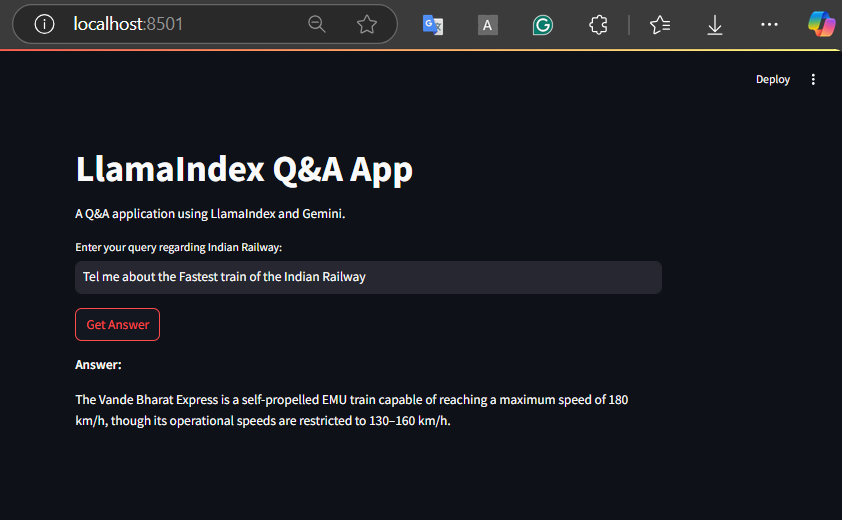

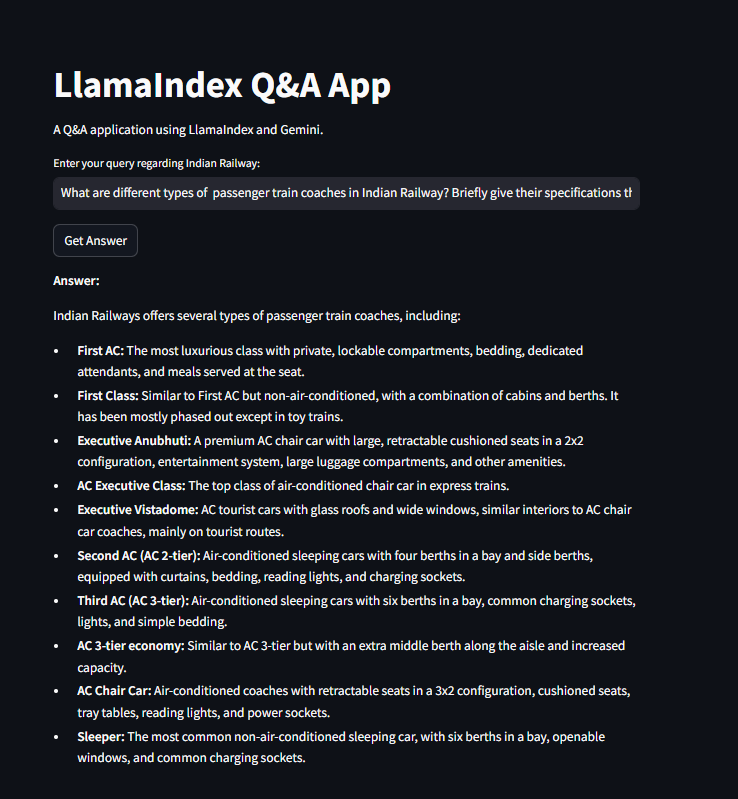

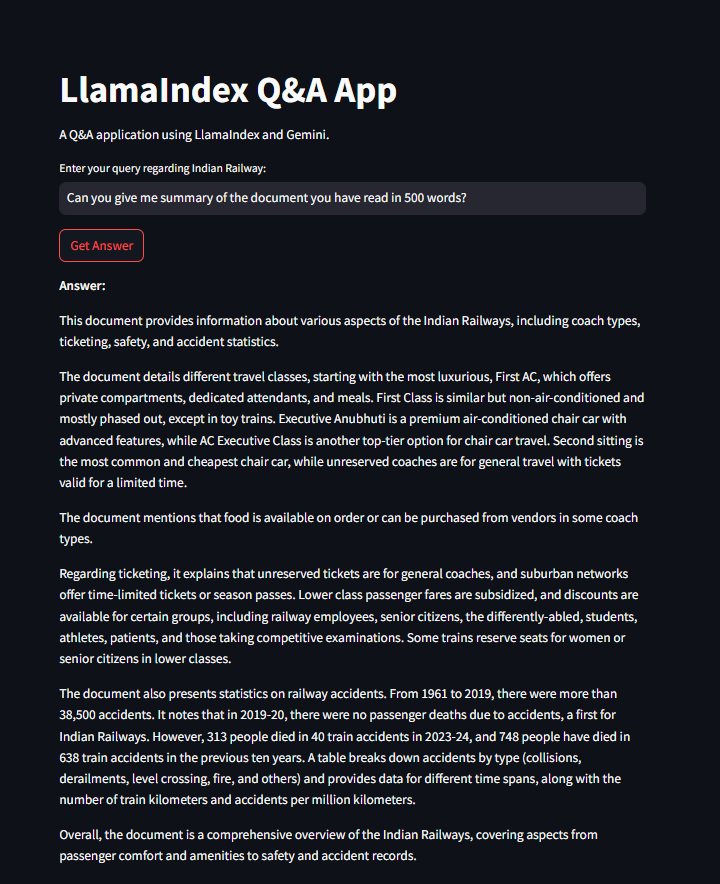

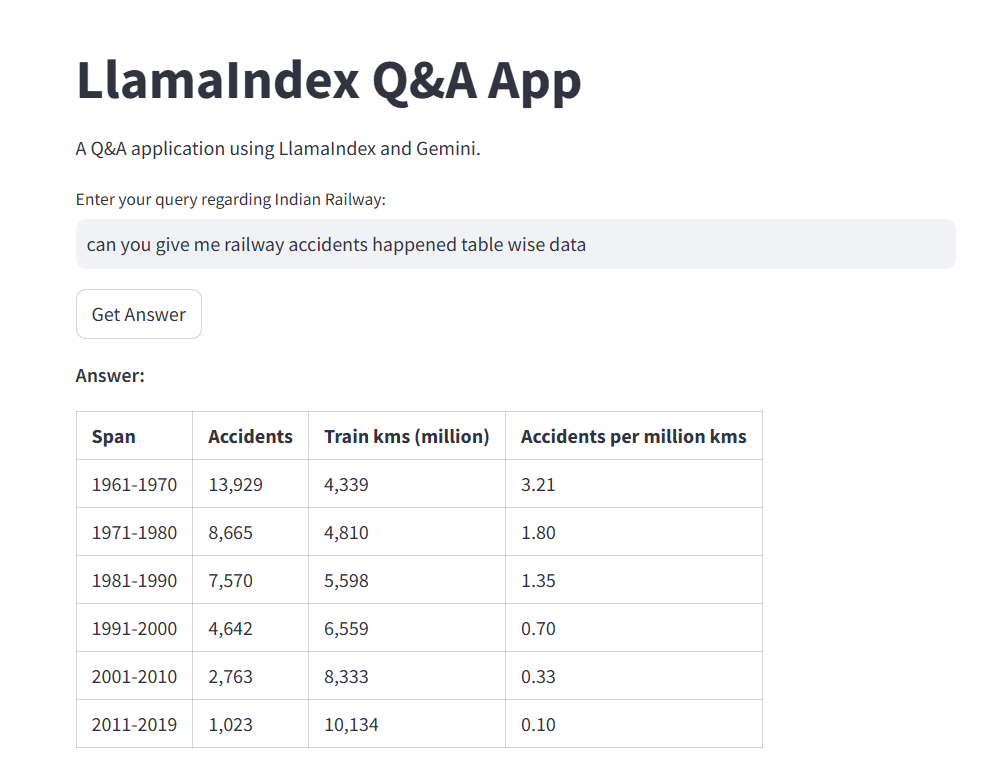

to access the deployed app on streamlit

https://myfirstappusingllamaindexgeminiapiindexingandllm.streamlit.app/